In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#โหลดข้อมูล และเปิดข้อมูล
df_weather = pd.read_csv('F1 Weather(2023-2018).csv')
df_weather.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Round Number,Year
0,0 days 00:00:57.060000,24.1,36.2,997.1,False,38.2,294,3.0,1,2018
1,0 days 00:01:57.078000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
2,0 days 00:02:57.090000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
3,0 days 00:03:57.106000,23.9,37.2,997.0,False,38.7,287,2.3,1,2018
4,0 days 00:04:57.121000,24.2,35.8,997.1,False,38.7,309,3.5,1,2018


In [3]:
# ตรวจสอบข้อมูล
print("Dataset Info:")
print(df_weather.info())
print("First 5 Rows:")
print(df_weather.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           18214 non-null  object 
 1   AirTemp        18214 non-null  float64
 2   Humidity       18214 non-null  float64
 3   Pressure       18214 non-null  float64
 4   Rainfall       18214 non-null  bool   
 5   TrackTemp      18214 non-null  float64
 6   WindDirection  18214 non-null  int64  
 7   WindSpeed      18214 non-null  float64
 8   Round Number   18214 non-null  int64  
 9   Year           18214 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 1.3+ MB
None
First 5 Rows:
                     Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0  0 days 00:00:57.060000     24.1      36.2     997.1     False       38.2   
1  0 days 00:01:57.078000     24.0      36.3     997.1     False       38.6   
2  0 days 00:02:57.090

In [4]:
# สร้าง RaceID อิงจากปีและรอบ
df_weather['RaceID'] = df_weather['Year'].astype(str) + '_R' + df_weather['Round Number'].astype(str)

In [5]:
# สรุปค่าเฉลี่ยสภาพอากาศในแต่ละสนาม 
race_weather = df_weather.groupby('RaceID').agg({
    'AirTemp': 'mean',
    'TrackTemp': 'mean',
    'Humidity': 'mean',
    'Rainfall': 'sum',
    'WindSpeed': 'mean'
}).reset_index()

print(race_weather.head())

     RaceID    AirTemp  TrackTemp   Humidity  Rainfall  WindSpeed
0   2018_R1  24.077477  36.324324  30.915315         5   3.691892
1  2018_R10  27.431633  52.169388  38.739796         0   1.461224
2  2018_R11  26.401923  40.668269  54.807692        27   2.008654
3  2018_R12  33.758879  51.089720  33.006542         0   1.142991
4  2018_R13  17.327358  27.898113  37.700943         0   2.039623


In [6]:
# ใช้ KMeans จัดกลุ่มตาม AirTemp, Rainfall, WindSpeed
X = race_weather[['AirTemp', 'Rainfall', 'WindSpeed']]
kmeans = KMeans(n_clusters=4)
race_weather['WeatherCluster'] = kmeans.fit_predict(X)

In [7]:
# เลขกลุ่มแทนชื่อที่อ่านง่ายของแต่ละสภาพอากาศ
cluster_labels = {
    0: 'Cool',
    1: 'Hot',
    2: 'Rainy',
    3: 'Windy'
}
race_weather['WeatherCategory'] = race_weather['WeatherCluster'].map(cluster_labels)

# แสดงข้อมูลกลุ่มโดยเฉลี่ย
print(race_weather.groupby('WeatherCategory')[['AirTemp', 'Rainfall', 'WindSpeed']].mean())

                   AirTemp    Rainfall  WindSpeed
WeatherCategory                                  
Cool             21.636231   42.500000   1.746308
Hot              24.041517    0.877358   1.683654
Rainy            14.865030  247.000000   1.276082
Windy            20.645812  104.750000   1.213076


Text(0.5, 1.0, 'Humidity Across Years')

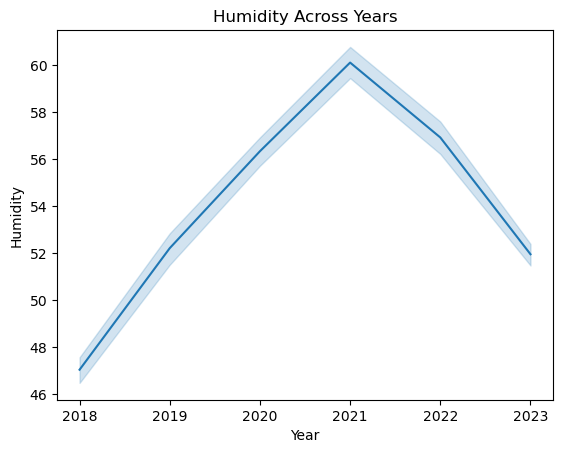

In [8]:
# ความชื้นในแต่ละปี
sns.lineplot(data=df_weather, x='Year', y='Humidity')
plt.title('Humidity Across Years')

Text(0.5, 1.0, 'Air Temperature Across Years')

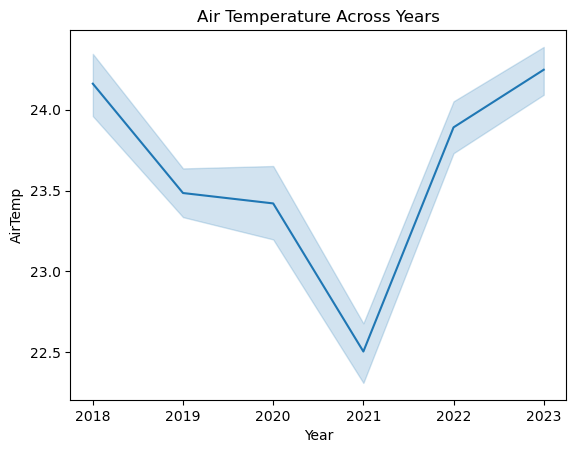

In [9]:
# อุณหภูมิของอากาศในแต่ละปี
sns.lineplot(data=df_weather, x='Year', y='AirTemp')
plt.title('Air Temperature Across Years')

Text(0.5, 1.0, 'Wind Speed Across Years')

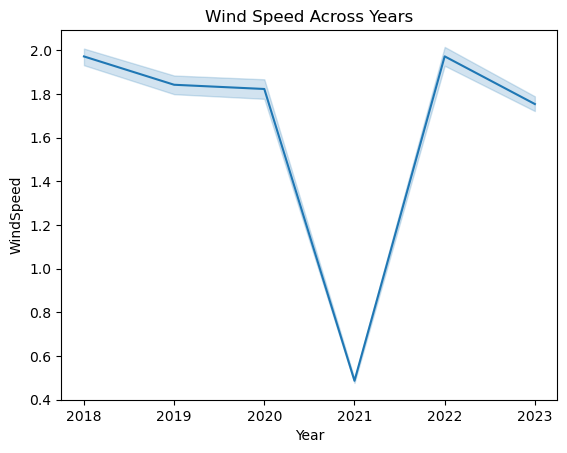

In [10]:
# ความเร็วลมในแต่ละปี
sns.lineplot(data=df_weather, x='Year', y='WindSpeed')
plt.title('Wind Speed Across Years')

Text(0.5, 1.0, 'Rainfall Across Years')

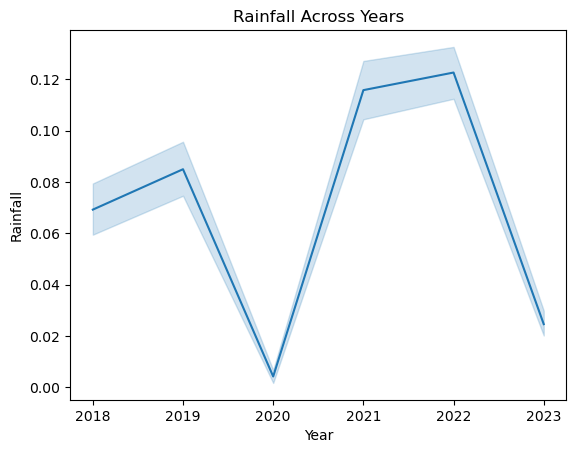

In [11]:
# ฝนตกในแต่ละปี
sns.lineplot(data=df_weather, x='Year', y='Rainfall')
plt.title('Rainfall Across Years')

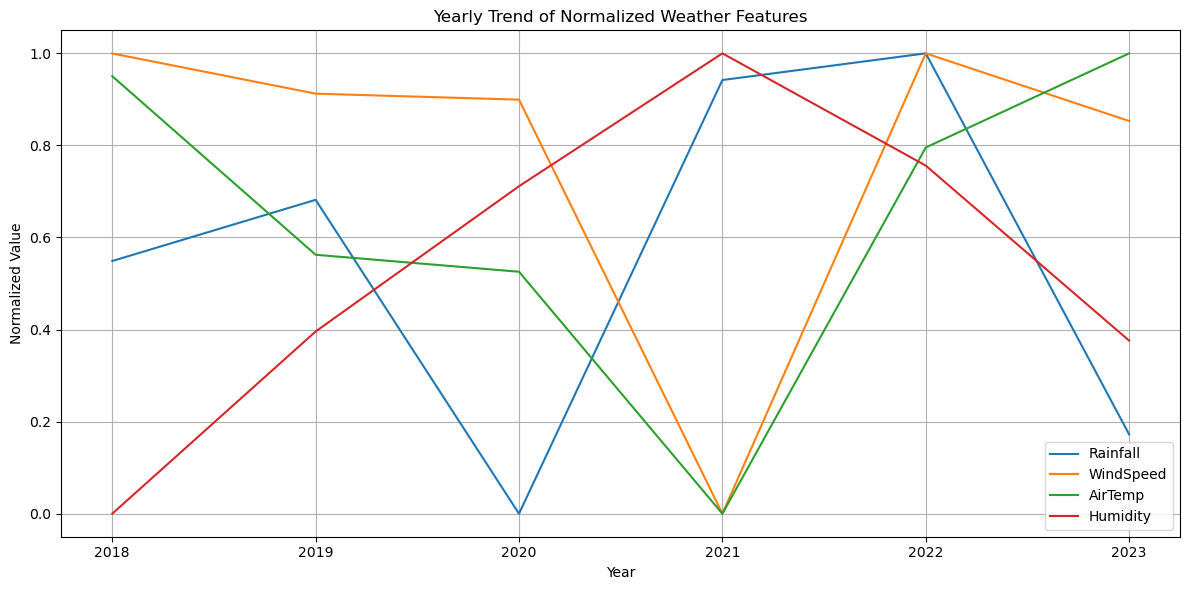

In [12]:
# หาค่าเฉลี่ยต่อปี
yearly_avg = df_weather.groupby('Year')[['Rainfall', 'WindSpeed', 'AirTemp', 'Humidity']].mean()

# Normalize ค่า เนื่องจากข้อมูลมีหน่วยที่ไม่เหมือนกัน
scaler = MinMaxScaler()
normalized_yearly = pd.DataFrame(scaler.fit_transform(yearly_avg), columns=yearly_avg.columns, index=yearly_avg.index)

# Plot ความชื้น ความเร็วลม อุณหภูมิของอากาศและฝนตกในแต่ละปี
plt.figure(figsize=(12,6))
for col in normalized_yearly.columns:
    plt.plot(normalized_yearly.index, normalized_yearly[col], label=col)

plt.title('Yearly Trend of Normalized Weather Features')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()